In [7]:
# import modules you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import seaborn as sns
# import googlemaps
# import gmaps
import requests
import praw # python reddit api wrapper
from pandas.io.json import json_normalize #special package in pandas
import json
%matplotlib inline
from bs4 import BeautifulSoup

In [8]:
car = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Surafel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df = pd.DataFrame(car)


In [10]:
# chages the format of the date
car['CRASH DATE'] = pd.to_datetime(car['CRASH DATE'])  
car

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-07-16,10:15,NaN,NaN,40.732720,-73.942810,POINT (-73.94281 40.73272),GREENPOINT AVENUE,KINGSLAND AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4171229,Flat Bed,Motorcycle,NaN,NaN,NaN
1,2019-08-06,9:00,QUEENS,11102,40.773273,-73.925120,POINT (-73.92512 40.773273),26 ROAD,21 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4183996,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-07-26,21:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234 42nd street,...,Unspecified,NaN,NaN,NaN,4178499,Pick-up Truck,Sedan,NaN,NaN,NaN
3,2019-08-08,15:45,BROOKLYN,11235,40.594524,-73.934010,POINT (-73.93401 40.594524),BRIGHAM STREET,AVENUE X,NaN,...,Unspecified,NaN,NaN,NaN,4185421,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-07-17,20:05,BROOKLYN,11213,40.675970,-73.933235,POINT (-73.933235 40.67597),SCHENECTADY AVENUE,DEAN STREET,NaN,...,Unspecified,NaN,NaN,NaN,4174313,Sedan,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682688,2012-09-03,19:30,BROOKLYN,11234,40.613539,-73.916806,POINT (-73.9168061 40.6135386),EAST 58 STREET,AVENUE U,NaN,...,Unspecified,Unspecified,NaN,NaN,126105,PASSENGER VEHICLE,PASSENGER VEHICLE,UNKNOWN,NaN,NaN
1682689,2012-09-01,19:30,MANHATTAN,10019,40.762859,-73.989401,POINT (-73.9894015 40.762859),WEST 49 STREET,9 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,38379,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN
1682690,2012-08-31,14:40,STATEN ISLAND,10304,40.607690,-74.089442,POINT (-74.0894424 40.6076902),CLOVE ROAD,TARGEE STREET,NaN,...,Unspecified,NaN,NaN,NaN,294033,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1682691,2012-08-31,8:40,BROOKLYN,11214,40.597267,-73.998657,POINT (-73.9986569 40.5972673),CROPSEY AVENUE,BAY PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,121824,VAN,PASSENGER VEHICLE,NaN,NaN,NaN


In [12]:
#greater than the start date and smaller than the end date
car['Year']=car['CRASH DATE'].dt.year

df1 = car[(car['CRASH DATE'] < '2020-6-10') & (car['CRASH DATE'] >= '2019-01-01')]

In [13]:
# df1 = pd.DataFrame(df.loc[mask])
pd.set_option("display.max_columns", None)
df1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year
0,2019-07-16,10:15,NaN,NaN,40.732720,-73.942810,POINT (-73.94281 40.73272),GREENPOINT AVENUE,KINGSLAND AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4171229,Flat Bed,Motorcycle,NaN,NaN,NaN,2019
1,2019-08-06,9:00,QUEENS,11102,40.773273,-73.925120,POINT (-73.92512 40.773273),26 ROAD,21 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4183996,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
2,2019-07-26,21:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234 42nd street,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4178499,Pick-up Truck,Sedan,NaN,NaN,NaN,2019
3,2019-08-08,15:45,BROOKLYN,11235,40.594524,-73.934010,POINT (-73.93401 40.594524),BRIGHAM STREET,AVENUE X,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4185421,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
4,2019-07-17,20:05,BROOKLYN,11213,40.675970,-73.933235,POINT (-73.933235 40.67597),SCHENECTADY AVENUE,DEAN STREET,NaN,1.0,0.0,0,0,1,0,0,0,Unsafe Speed,Unspecified,NaN,NaN,NaN,4174313,Sedan,Bike,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280352,2019-01-22,18:10,NaN,NaN,40.681503,-73.904106,POINT (-73.904106 40.681503),BUSHWICK AVENUE,EASTERN PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,4059391,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
280353,2019-01-10,18:25,BROOKLYN,11219,40.633970,-74.007020,POINT (-74.00702 40.63397),NaN,NaN,905 60 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Following Too Closely,Following Too Closely,Unspecified,NaN,4064988,Dump,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,2019
280354,2019-01-10,16:53,QUEENS,11105,40.773090,-73.911080,POINT (-73.91108 40.77309),35 STREET,23 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4066313,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019
280355,2019-01-18,15:45,NaN,NaN,40.789085,-73.780464,POINT (-73.780464 40.789085),CROSS ISLAND PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4057254,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,2019


In [14]:
df1.head()
train=df1.sample(frac=0.3,random_state=100)
df1['CRASH DATE']=pd.to_datetime(df1['CRASH DATE'])
df1['Year']=df1['CRASH DATE'].dt.year
df1['Month']=df1['CRASH DATE'].dt.month
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1['Month'].replace(month_map,inplace=True)


C:\Users\Surafel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Surafel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Surafel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [15]:
df1 = df1.replace(np.nan, '', regex=True)


# creates a new coumn called hour of day 
df1['Hour Of Day']= pd.to_datetime(df1['CRASH TIME']).dt.strftime('%H')

df1.head()

# df1.to_csv(r'C:\Users\Surafel\Documents\INST 447\INST 447 Panda\Final project\19-2020.csv', index = False)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year,Month,Hour Of Day
0,2019-07-16,10:15,,,40.7327,-73.9428,POINT (-73.94281 40.73272),GREENPOINT AVENUE,KINGSLAND AVENUE,,1.0,0.0,0,0,0,0,1,0,Passing or Lane Usage Improper,Unspecified,,,,4171229,Flat Bed,Motorcycle,,,,2019,Jul,10
1,2019-08-06,9:00,QUEENS,11102,40.7733,-73.9251,POINT (-73.92512 40.773273),26 ROAD,21 STREET,,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,,,,4183996,Pick-up Truck,Station Wagon/Sport Utility Vehicle,,,,2019,Aug,09
2,2019-07-26,21:45,,,,,,,,234 42nd street,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,4178499,Pick-up Truck,Sedan,,,,2019,Jul,21
3,2019-08-08,15:45,BROOKLYN,11235,40.5945,-73.934,POINT (-73.93401 40.594524),BRIGHAM STREET,AVENUE X,,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,,,,4185421,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,,2019,Aug,15
4,2019-07-17,20:05,BROOKLYN,11213,40.676,-73.9332,POINT (-73.933235 40.67597),SCHENECTADY AVENUE,DEAN STREET,,1.0,0.0,0,0,1,0,0,0,Unsafe Speed,Unspecified,,,,4174313,Sedan,Bike,,,,2019,Jul,20


In [16]:
df1.head()
# counts the types of vehicle invoved in the accsident 
# the other vechicale type code has the same category of vehicles but diffrent values 
df1['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  117550
Station Wagon/Sport Utility Vehicle     99084
Taxi                                    11958
Pick-up Truck                            7675
Box Truck                                5200
                                        ...  
SANTI                                       1
yello                                       1
G com                                       1
PUSH                                        1
I-hau                                       1
Name: VEHICLE TYPE CODE 1, Length: 425, dtype: int64

In [17]:
df1['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           68317
Unspecified                                              61783
Following Too Closely                                    22861
Failure to Yield Right-of-Way                            18177
Backing Unsafely                                         11547
Passing or Lane Usage Improper                           11061
Passing Too Closely                                      10468
Unsafe Lane Changing                                      8008
Other Vehicular                                           7744
Turning Improperly                                        5524
Traffic Control Disregarded                               4313
Unsafe Speed                                              4181
Reaction to Uninvolved Vehicle                            4095
Driver Inexperience                                       4054
Alcohol Involvement                                       2823
Pavement Slippery                                      

In [18]:
# groups my year and counts the total for each type of accidents 
year_acc =  [df1.groupby(['Year'])['NUMBER OF MOTORIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF PERSONS KILLED'].sum()
           ,df1.groupby(['Year'])['NUMBER OF PEDESTRIANS INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF PEDESTRIANS KILLED'].sum(),
           df1.groupby(['Year'])['NUMBER OF CYCLIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF CYCLIST KILLED'].sum(),
           df1.groupby(['Year'])['NUMBER OF MOTORIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF MOTORIST KILLED'].sum()]
year_acc

[Year
 2019    45825
 2020    11852
 Name: NUMBER OF MOTORIST INJURED, dtype: int64, Year
 2019    244.0
 2020     78.0
 Name: NUMBER OF PERSONS KILLED, dtype: float64, Year
 2019    10568
 2020     2795
 Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64, Year
 2019    131
 2020     34
 Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64, Year
 2019    4986
 2020    1371
 Name: NUMBER OF CYCLIST INJURED, dtype: int64, Year
 2019    31
 2020     4
 Name: NUMBER OF CYCLIST KILLED, dtype: int64, Year
 2019    45825
 2020    11852
 Name: NUMBER OF MOTORIST INJURED, dtype: int64, Year
 2019    82
 2020    40
 Name: NUMBER OF MOTORIST KILLED, dtype: int64]

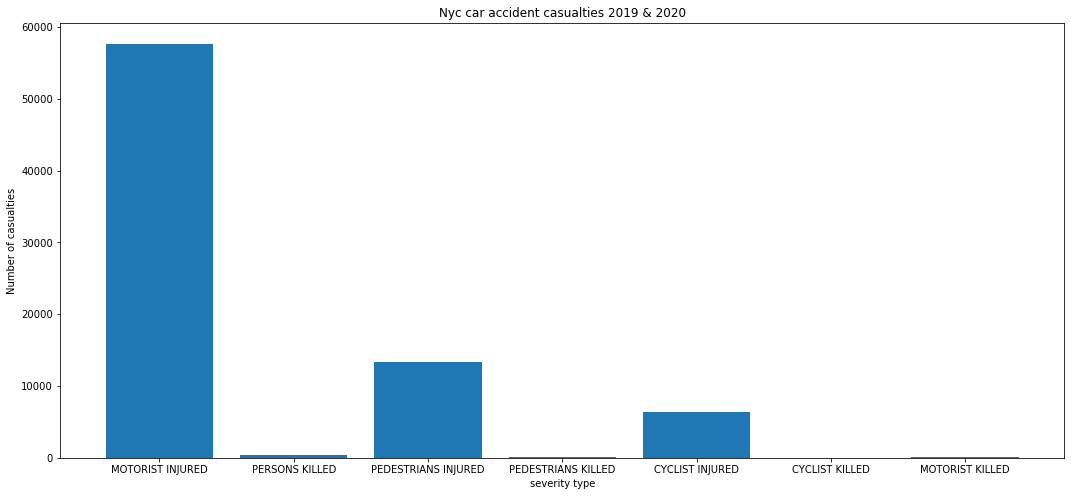

In [19]:
severe =  [df1['NUMBER OF MOTORIST INJURED'].sum(),df1['NUMBER OF PERSONS KILLED'].sum()
           ,df1['NUMBER OF PEDESTRIANS INJURED'].sum(),df1['NUMBER OF PEDESTRIANS KILLED'].sum(),
           df1['NUMBER OF CYCLIST INJURED'].sum(),df1['NUMBER OF CYCLIST KILLED'].sum(),
           df1['NUMBER OF MOTORIST INJURED'].sum(),df1['NUMBER OF MOTORIST KILLED'].sum()]

typeOfAcc= ["MOTORIST INJURED",'PERSONS KILLED',
            'PEDESTRIANS INJURED','PEDESTRIANS KILLED',
            'CYCLIST INJURED','CYCLIST KILLED',
           'MOTORIST INJURED','MOTORIST KILLED']

plt.bar(typeOfAcc,severe)
plt.xlabel('severity type')
plt.ylabel('Number of casualties')
plt.title('Nyc car accident casualties 2019 & 2020')
plt.gcf().set_size_inches(18, 8)
plt.show()

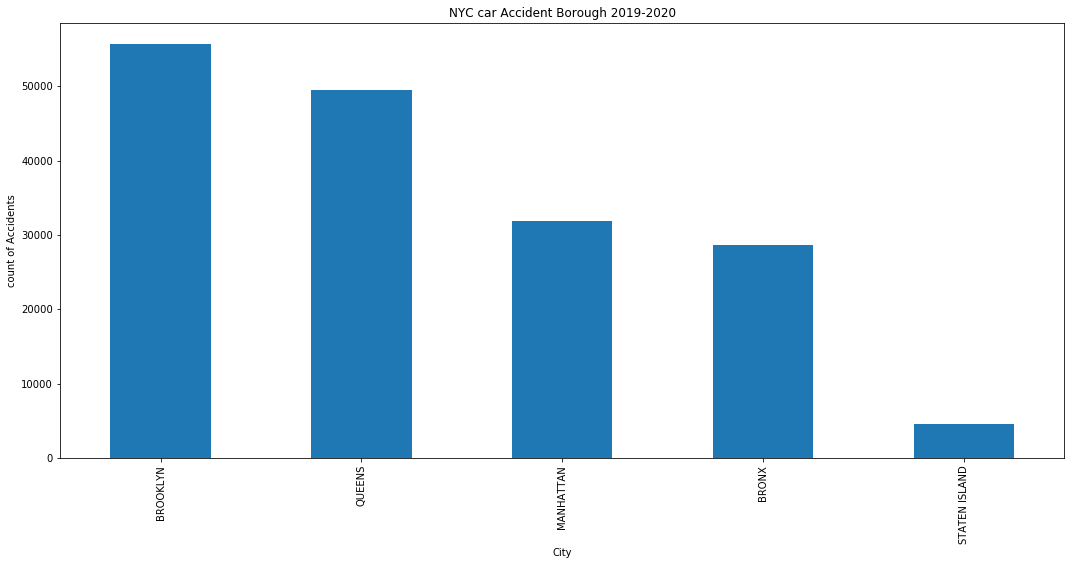

In [20]:
# what city the accident 
df1['BOROUGH'].replace('',np.nan, inplace = True) # Lables empty cells in Borough nan
pd.value_counts(df1['BOROUGH']).plot.bar()
plt.xlabel('City')
plt.ylabel('count of Accidents')
plt.title('NYC car Accident Borough 2019-2020')

plt.gcf().set_size_inches(18, 8)
plt.show()

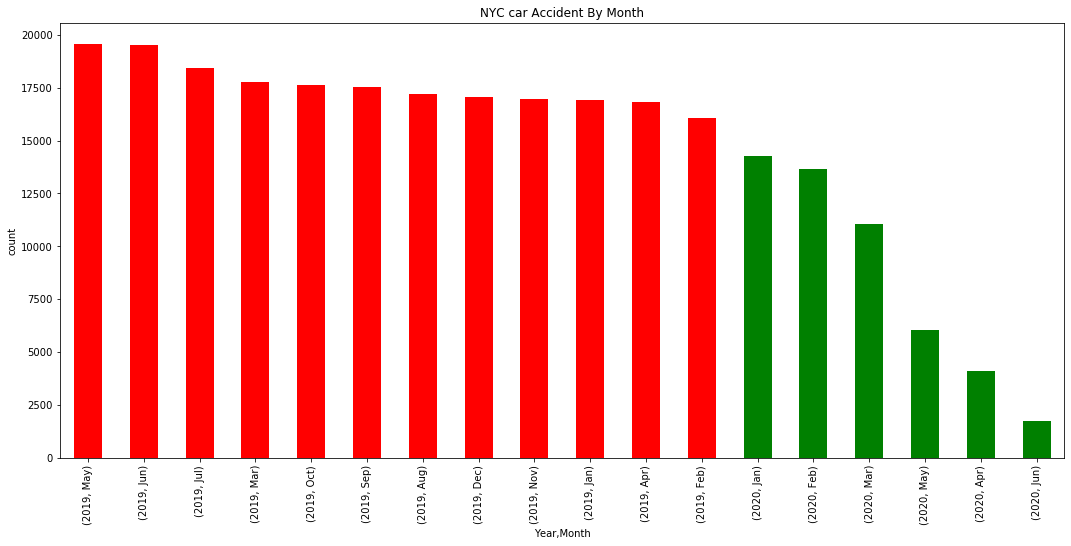

In [21]:
#pd.value_counts(df1['BOROUGH']).plot.bar()
year = df1[['Year','Month']]
#pd.value_counts.groupby('Year')(df1['Month']).plot.bar()
# this make a bar plot by grouping it by year 
# There most likely better ways to do this but this was faster 
df1.groupby(['Year'])['Month'].value_counts().plot.bar( color=['red','red','red','red',
                                                               'red','red','red','red',
                                                               'red','red','red','red',
                                                               'green', 'green', 'green',
                                                               'green', 'green', 'green', 
                                                               'green', 'green'])
plt.ylabel('count')
plt.title('NYC car Accident By Month')

plt.gcf().set_size_inches(18, 8)


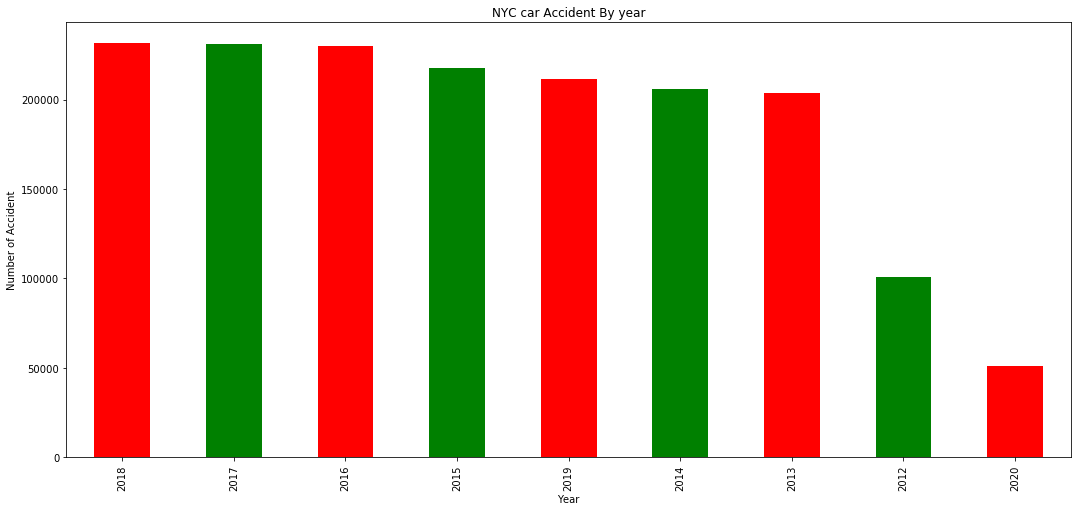

In [22]:
pd.value_counts(car['Year']).plot.bar(color=['red','green'])
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.title('NYC car Accident By year')

plt.gcf().set_size_inches(18, 8)

plt.show()

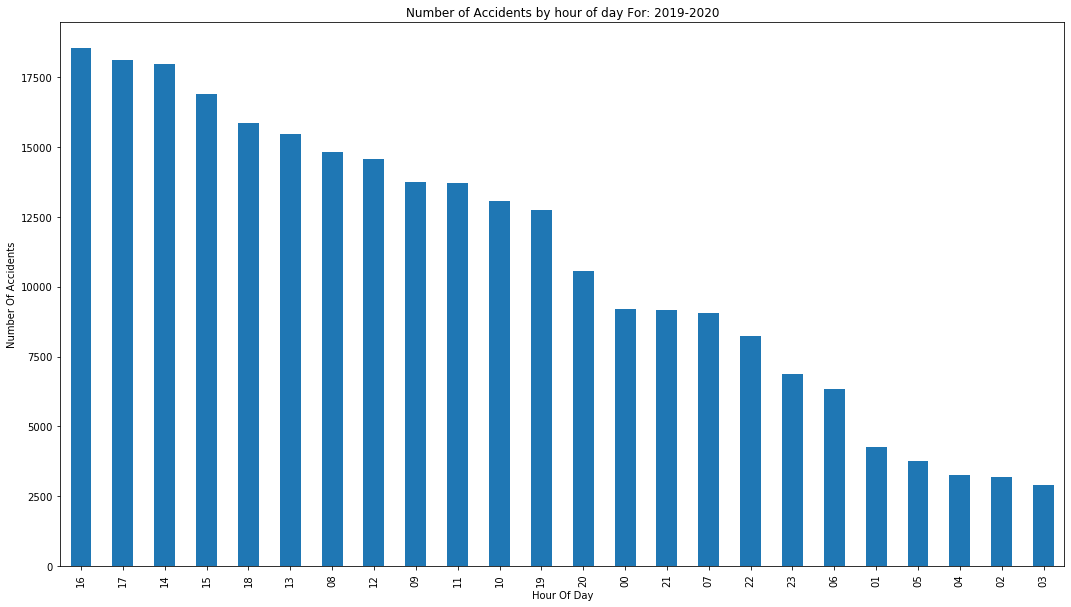

In [23]:
pd.value_counts(df1['Hour Of Day']).plot.bar()
plt.title('Number of Accidents by hour of day For: 2019-2020')
plt.xlabel('Hour Of Day')
plt.ylabel("Number Of Accidents")
plt.gcf().set_size_inches(18, 10)


In [17]:
# import pandas as pd
# from sodapy import Socrata
# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# client = Socrata("data.cityofnewyork.us", None)

# results = client.get("h9gi-nx95", limit= 676892)
# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)


from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

results = client.get("h9gi-nx95", limit= 60000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)